In [1]:
from itertools import combinations
import numpy as np
import random
import pandas as pd

In [2]:
# List all of the teams

teams = [
    "Boston College", "Clemson", "Duke", "Florida State", "Georgia Tech",
    "Louisville", "Miami", "North Carolina", "NC State", "Notre Dame",
    "Pitt", "Virginia", "Virginia Tech", "Wake Forest"
]


In [3]:
# Generate a random schedule

def generate_unique_matchups_schedule(teams):
    num_unique_matchups = 10  # Each team plays 10 unique matchups
    games_per_matchup = 3  # Each matchup is played 3 times
    num_days = 30  # Total days of play
    games_per_day = 7  # Games per day

    # Generate unique matchups for each team ensuring each plays 10 other teams
    all_matchups = list(combinations(teams, 2))  # All possible unique pairs of teams
    np.random.shuffle(all_matchups)  # Shuffle the matchups

    team_matchups = {team: [] for team in teams}  # Track matchups for each team
    valid_matchups = []  # Store valid selected matchups

    # Select 10 unique matchups for each team
    for matchup in all_matchups:
        team1, team2 = matchup
        if len(team_matchups[team1]) < num_unique_matchups and len(team_matchups[team2]) < num_unique_matchups:
            team_matchups[team1].append(matchup)
            team_matchups[team2].append(matchup)
            valid_matchups.append(matchup)
            if all(len(matches) == num_unique_matchups for matches in team_matchups.values()):
                break

    # Expand each matchup into 3 games
    expanded_matchups = []
    for matchup in valid_matchups:
        expanded_matchups.extend([matchup] * games_per_matchup)

    # Shuffle the expanded list of matchups to distribute them randomly across days
    np.random.shuffle(expanded_matchups)

    # Organize games into days
    schedule = []
    for day in range(num_days):
        day_schedule = expanded_matchups[day * games_per_day:(day + 1) * games_per_day]
        for game in day_schedule:
            schedule.append((day + 1, game[0], game[1]))

    return schedule

# Can't figure out how to ensure validity, so wrapping here
def get_valid_sched(teams):
    valid = False
    while not valid:
        schedule = generate_unique_matchups_schedule(teams)
        # Count the number of games for each team
        game_counts = {team: 0 for team in teams}
        for _, team1, team2 in schedule:
            game_counts[team1] += 1
            game_counts[team2] += 1
        # Check if total games are 210 (each game is counted twice, once for each team)
        if sum(game_counts.values()) == 420:
            valid = True
    return schedule


In [4]:
# Generate the schedule and check the first few entries
unique_matchups_schedule = get_valid_sched(teams)
len(unique_matchups_schedule)

210

In [5]:
# Use dataframes like a good data scientist
sched = pd.DataFrame(unique_matchups_schedule, columns=['day', 'team1', 'team2'])

import pandas as pd
import numpy as np

def simulate_season(teams, sched, distribution=np.random.normal, scale = 1):
    # Step 1: Assign skill levels from the specified distribution
    skills = distribution(size = len(teams), scale = scale)
    team_skills = dict(zip(teams, skills))
    
    # Step 3: Simulate each game
    results = {team: {'wins': 0, 'losses': 0} for team in teams}
    for day, team1, team2 in sched:
        skill_diff = team_skills[team1] - team_skills[team2]
        probability_team1_wins = 1 / (1 + np.exp(-skill_diff))  # Logistic function to determine win probability
        
        if np.random.rand() < probability_team1_wins:
            results[team1]['wins'] += 1
            results[team2]['losses'] += 1
        else:
            results[team2]['wins'] += 1
            results[team1]['losses'] += 1
            
    # Step 4: Create output DataFrame
    records_df = pd.DataFrame.from_dict(results, orient='index').sort_values('wins', ascending=False)
    
    return records_df



In [6]:

season_results = simulate_season(teams, unique_matchups_schedule, distribution=np.random.normal, scale=0)
print(season_results)

                wins  losses
Pitt              22       8
Virginia          20      10
Wake Forest       19      11
Notre Dame        17      13
Boston College    16      14
Georgia Tech      16      14
Virginia Tech     15      15
Florida State     14      16
North Carolina    14      16
Clemson           13      17
Miami             13      17
NC State          13      17
Louisville        11      19
Duke               7      23


In [7]:
# Simulate a bunch of random seasons
def simulate_seasons(teams, sched, n = 10000, distribution=np.random.normal, scale = 1):
    max_wins_each_season = []

    for _ in range(n):
        season_results = simulate_season(teams, sched, distribution, scale)
        max_wins = season_results.wins.max()
        max_wins_each_season.append(max_wins)
    
    return max_wins_each_season


In [8]:
s = simulate_seasons(teams, unique_matchups_schedule, scale=0)

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import percentileofscore

def plot_distribution(data):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=11, color='blue', alpha=1.0, edgecolor='black', rwidth=1.0, range=(16, 26))
    plt.title('Max Wins if All Teams Equal')
    plt.xlabel('Wins')
    plt.ylabel(None)  # Removes y-axis label
    plt.gca().axes.get_yaxis().set_visible(False)  # Hides y-axis ticks and numbers
    plt.grid(False)
    plt.show()

def find_percentile(data, value):
    # Calculate the percentile rank of the given value in the data
    rank = percentileofscore(data, value)
    return rank




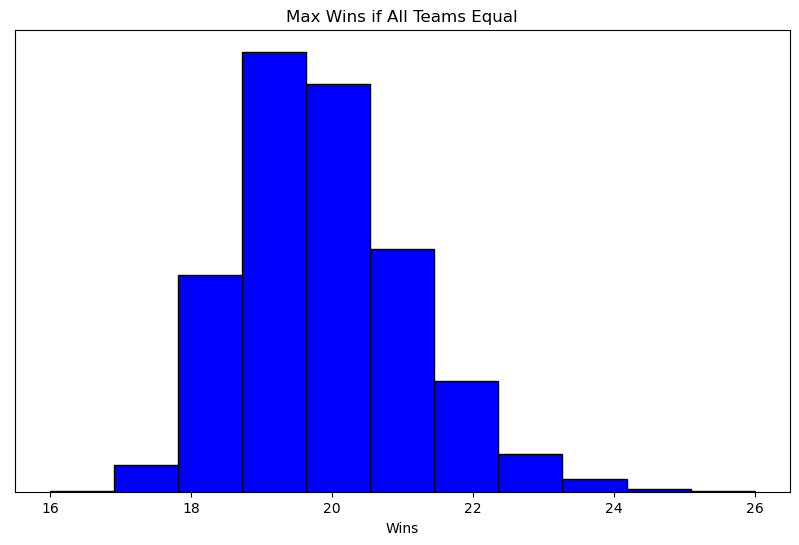

In [30]:
plot_distribution(s)

In [31]:
find_percentile(s, 22)

92.755